In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2022-08-24') 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540044
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747408
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880661
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860232
...,...,...,...,...,...,...
2022-08-18,174.899994,173.119995,173.750000,174.149994,62290100.0,174.149994
2022-08-19,173.740005,171.309998,173.029999,171.520004,70211500.0,171.520004
2022-08-22,169.860001,167.139999,169.690002,167.570007,69026800.0,167.570007


In [4]:
df.shape

(2679, 6)

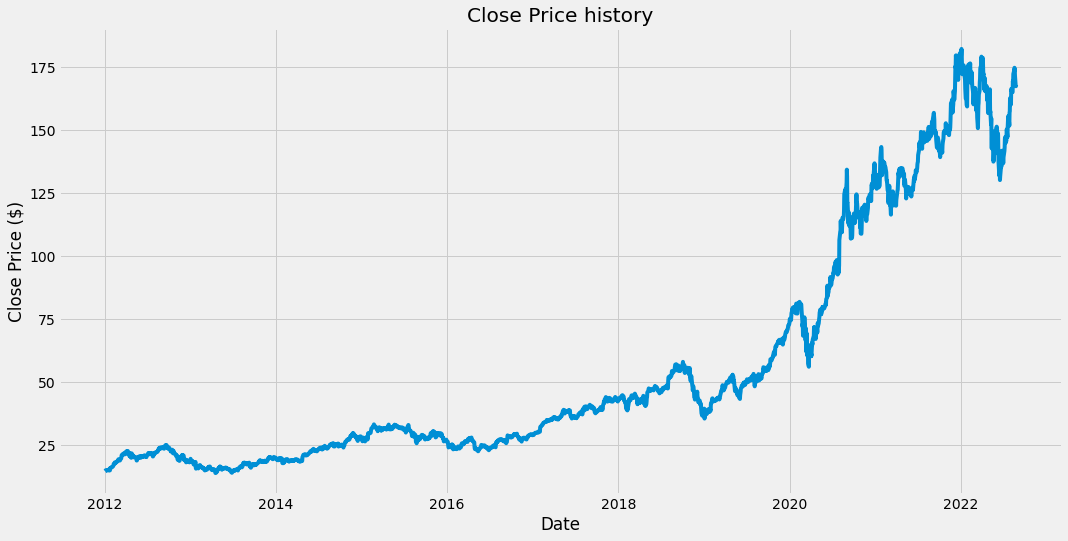

In [7]:
#Visualize Close Price history
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

In [10]:
#only close column
data=df.filter(['Close'])

In [13]:
#convert to numpy
dataset=data.values

In [14]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2144

In [16]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.91407966],
       [0.91205653],
       [0.91616216]])

In [20]:
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split into x_train and y_train datasets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [21]:
#convert x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train), np.array(y_train)

In [23]:
#reshape 
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2084, 60, 1)

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2084/2084 [==============================] - 67s 31ms/step - loss: 3.4057e-04


In [33]:
#Create the testing dataset- a new array containing scaled values from 2048 to 2679
test_data=scaled_data[training_data_len-60:,:]
#Create x_test, y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [34]:
#Convert to numpy array
x_test=np.array(x_test)

In [35]:
#reshape 
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(535, 60, 1)

In [36]:
#Get the models' predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [37]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.2804644575742918

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


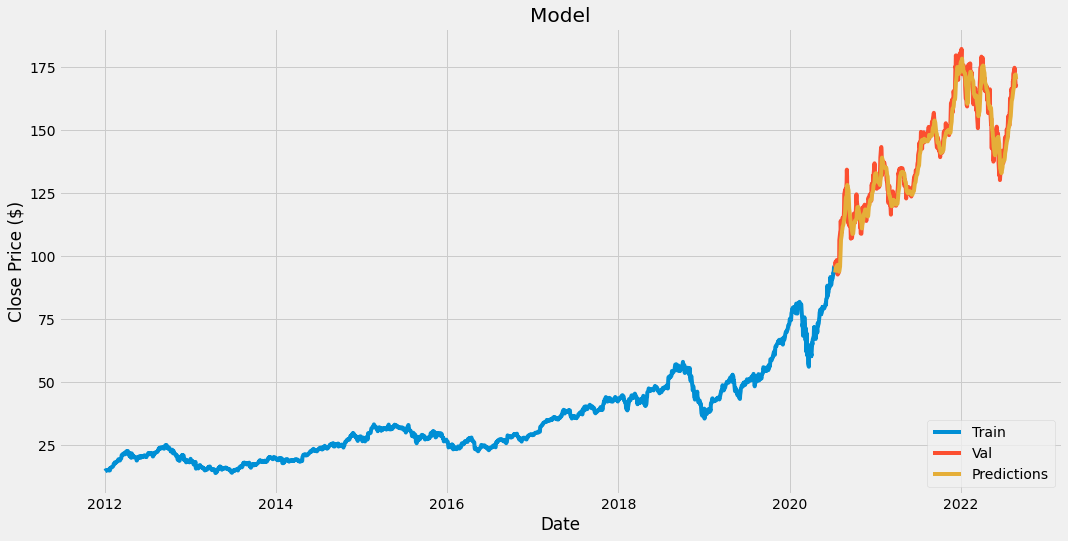

In [38]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [39]:
#show val and pred prices
valid

,Close,Predictions
Date,,
2020-07-13,95.477501,93.405365
2020-07-14,97.057503,93.960251
2020-07-15,97.724998,94.582703
2020-07-16,96.522499,95.235466
2020-07-17,96.327499,95.614281
...,...,...
2022-08-18,174.149994,170.796417
2022-08-19,171.520004,171.702103
2022-08-22,167.570007,171.892914


In [40]:
#Preediction
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2022-08-24')
#new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 days closing price and convert it to an array
last_60_days=new_df[-60:].values
#Scale the data 
last_60_days_scaled=scaler.transform(last_60_days)
#empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert X_test to a numpy array
X_test=np.array(X_test)
#Reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[168.93654]]


In [46]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2022-08-24', end='2022-08-24')
apple_quote2['Close']

Date
2022-08-24    167.529999
Name: Close, dtype: float64